11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


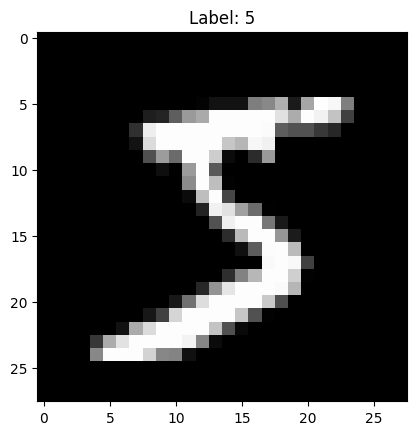

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8703 - loss: 0.4431 - val_accuracy: 0.9680 - val_loss: 0.1048
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9659 - loss: 0.1118 - val_accuracy: 0.9702 - val_loss: 0.1023
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9759 - loss: 0.0734 - val_accuracy: 0.9753 - val_loss: 0.0801
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9824 - loss: 0.0562 - val_accuracy: 0.9760 - val_loss: 0.0765
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9865 - loss: 0.0412 - val_accuracy: 0.9787 - val_loss: 0.0687
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.0905
Test Accuracy: 0.98
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 966    0    1    0    0    1    7    0    3    2]
 [   0 1122    1    2    0    0    2    0    8    0]
 [   0    3 1005    4    1    0    4    4   11    0]
 [   0    2    4  982    0    4    0    7    7    4]
 [

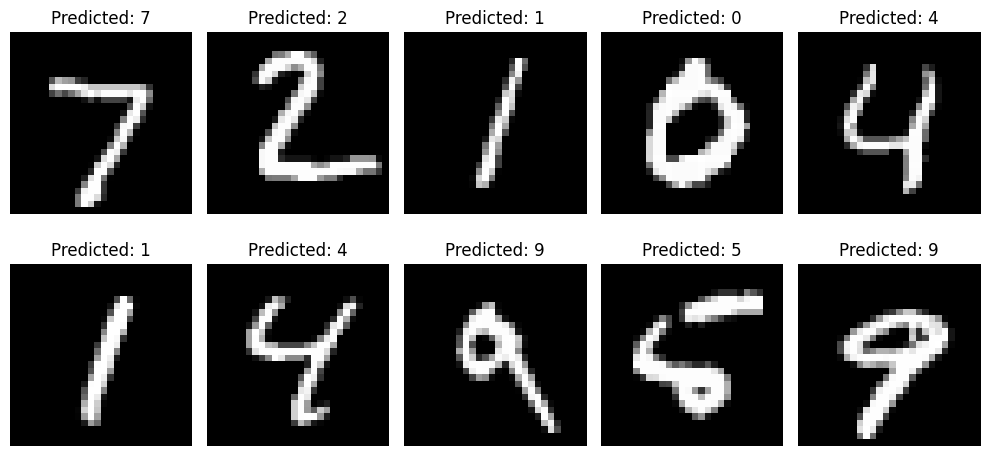

In [1]:
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load the MNIST Dataset (Images of digits 0–9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 3. Show an Example Image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# 4. Normalize the Images (Convert pixels to 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 5. One-Hot Encode the Labels (for multi-class classification)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# 6. Build the Neural Network Model
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Flatten 28x28 image to 784
    Dense(128, activation='relu'),       # First hidden layer
    Dense(64, activation='relu'),        # Second hidden layer
    Dense(10, activation='softmax')      # Output layer (10 classes)
])

# 7. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 8. Train the Model
model.fit(X_train, y_train_encoded, epochs=5, validation_split=0.1)

# 9. Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.2f}")

# 10. Make Predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# 11. Show the Confusion Matrix and Report
print(confusion_matrix(y_test, predicted_classes))
print(classification_report(y_test, predicted_classes))

# 12. Show Sample Predictions
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
